In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import operator

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pickle_in = open("/content/drive/MyDrive/IDSIA Biomedical Texts/AllSourceEmotionsFeatures.pickle", 'rb')
df = pickle.load(pickle_in)
df.head()

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity,Drives,affiliation,achieve,power,Cognition,allnone,cogproc,insight,cause,discrep,tentat,certitude,differ,memory,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,swear,Social,socbehav,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male,Culture,politic,ethnicity,tech,Lifestyle,leisure,home,work,money,relig,Physical,health,illness,wellness,mental,substances,sexual,food,death,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Perception,attention,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,emo_label_prob,top_five_emolabelprob,emo_labels,emo_label_rank,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,https://www.quora.com/What-are-panic-attacks-l...,I have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.00,26.39,25.86,93.74,68.86,57.50,12.85,6.26,3.13,0.16,2.31,0.0,0.16,6.59,15.16,7.74,1.15,14.66,9.88,7.08,6.59,0.82,15.82,5.11,5.11,3.46,0.49,1.15,1.81,18.62,0.33,18.29,2.80,3.13,2.47,4.45,0.99,4.45,0.00,10.71,0.99,9.56,7.74,0.16,7.58,6.92,0.16,0.16,0.16,8.73,3.46,0.33,0.33,1.32,0.0,1.15,5.27,0.33,0.0,0.00,0.00,0.00,0.0,0.0,0.00,2.31,0.00,0.00,1.98,0.33,0.00,9.88,8.07,0.82,0.0,5.11,0.0,0.0,0.00,0.16,0.33,0.33,0.16,0.33,0.16,0.49,0.0,0.49,0.16,6.26,7.08,0.33,0.66,4.78,0.16,0.00,1.65,4.61,1.81,8.07,1.48,0.00,0.00,0.00,0.0,0.0,19.93,4.61,9.88,0.16,0.16,2.80,2.31,0.33,"{'admiration': 1.609722e-05, 'amusement': 0.00...","[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, caring]","{'fear': 1, 'nervousness': 2, 'confusion': 3, ...",0.000016,0.000150,0.000705,0.001447,0.000643,0.009114,0.048850,0.010012,0.000057,0.000440,0.000339,0.000160,0.000265,0.000173,0.854317,0.000166,0.000265,0.000040,0.000210,0.068864,0.000185,0.000041,0.000323,0.001267,0.000330,0.000575,0.000205,0.000843
1,https://www.quora.com/What-are-panic-attacks-l...,"I was walking to school, but was running late ...",Quora,1,401,54.08,1.31,99.00,8.57,13.83,14.21,90.02,74.81,61.60,17.96,12.72,11.47,0.00,0.25,0.0,0.75,5.24,15.46,7.98,1.25,15.71,6.98,5.74,6.23,2.00,15.21,5.24,3.24,1.50,0.25,0.75,0.50,11.97,2.74,9.23,1.50,2.00,2.49,1.00,0.25,2.49,0.00,4.24,1.50,2.74,1.50,0.75,0.75,0.00,0.00,0.00,0.00,4.74,2.24,0.25,0.00,0.25,0.0,1.00,2.49,0.00,0.0,0.25,0.00,0.00,0.0,0.0,0.00,3.49,1.00,0.25,2.24,0.00,0.00,3.99,0.50,0.00,0.5,0.00,0.0,0.0,0.00,0.00,0.00,0.25,0.50,0.00,0.00,0.00,0.0,0.25,0.00,3.49,14.71,0.25,3.24,8.98,0.75,0.75,1.50,7.98,10.22,0.75,0.75,0.00,0.00,0.00,0.0,0.0,13.47,6.98,4.74,0.25,0.00,1.50,0.00,0.00,"{'admiration': 5.3580854e-05, 'amusement': 0.1...","[(sadness, 0.41607377), (annoyance, 0.20149426...","[sadness, annoyance, amusement, disappointment...","{'sadness': 1, 'annoyance': 2, 'amusement': 3,...",0.000054,0.167888,0.011522,0.201494,0.000443,0.001504,0.002532,0.000539,0.000486,0.053486,0.012135,0.005403,0.012620,0.000473,0.045313,0.001156,0.000709,0.017801,0.003212,0.013415,0.000246,0.000617,0.022932,0.000231,0.003261,0.416074,0.001216,0.003240
2,https://www.quora.com/What-are-panic-attacks-l...,"For me, panic attacks come two ways: randomly ...",Quora,1,446,25.83,93.36,75.79,1.00,12.74,15.47,95.74,75.34,59.64,17.26,13.00,2.91,0.00,9.87,0.0,0.22,4.26,13.90,6.28,1.35,13.23,9.64,6.95,9.42,1.35,18.39,6.73,4.71,2.69,0.22,1.57,0.90,19.51,1.12,18.39,3.36,2.24,2.02,4.93,0.67,4.04,0.00,9.64,1.35,8.07,6.28,0.45,5.61,4.71,0.00,0.45,0.00,11.88,1.57,0.22,0.00,0.67,0.0,0.45,10.09,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,1.

In [ ]:
# converting it to list and taking all 28 emotions this time, not 5
df['emo_label_prob'].apply( lambda x: sorted(x.items(), key=operator.itemgetter(1),reverse=True) )

0       [(fear, 0.8543168), (nervousness, 0.068863705)...
1       [(sadness, 0.41607377), (annoyance, 0.20149426...
2       [(confusion, 0.4124936), (realization, 0.33661...
3       [(fear, 0.8212809), (sadness, 0.057984624), (a...
4       [(fear, 0.9109314), (nervousness, 0.07942193),...
                              ...                        
7400    [(gratitude, 0.9954922), (caring, 0.0015136603...
7401    [(gratitude, 0.99666744), (neutral, 0.00110480...
7402    [(gratitude, 0.99716693), (curiosity, 0.000702...
7403    [(caring, 0.9326576), (nervousness, 0.01679318...
7404    [(caring, 0.9205363), (approval, 0.03912926), ...
Name: emo_label_prob, Length: 7405, dtype: object

In [ ]:
len(df['emo_label_prob'].apply( lambda x: sorted(x.items(), key=operator.itemgetter(1),reverse=True) ))

7405

In [ ]:
len(df['emo_label_prob'].apply( lambda x: sorted(x.items(), key=operator.itemgetter(1),reverse=True) )[0])

28

In [ ]:
df['all_emolabelprob'] = df['emo_label_prob'].apply( lambda x: sorted(x.items(), key=operator.itemgetter(1),reverse=True) )

In [ ]:
df.head(2)

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity,Drives,affiliation,achieve,power,Cognition,allnone,cogproc,insight,cause,discrep,tentat,certitude,differ,memory,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,swear,Social,socbehav,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male,Culture,politic,ethnicity,tech,Lifestyle,leisure,home,work,money,relig,Physical,health,illness,wellness,mental,substances,sexual,food,death,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Perception,attention,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,emo_label_prob,top_five_emolabelprob,emo_labels,emo_label_rank,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,all_emolabelprob
0,https://www.quora.com/What-are-panic-attacks-l...,I have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.00,26.39,25.86,93.74,68.86,57.5,12.85,6.26,3.13,0.16,2.31,0.0,0.16,6.59,15.16,7.74,1.15,14.66,9.88,7.08,6.59,0.82,15.82,5.11,5.11,3.46,0.49,1.15,1.81,18.62,0.33,18.29,2.8,3.13,2.47,4.45,0.99,4.45,0.0,10.71,0.99,9.56,7.74,0.16,7.58,6.92,0.16,0.16,0.16,8.73,3.46,0.33,0.33,1.32,0.0,1.15,5.27,0.33,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2.31,0.0,0.00,1.98,0.33,0.0,9.88,8.07,0.82,0.0,5.11,0.0,0.0,0.0,0.16,0.33,0.33,0.16,0.33,0.16,0.49,0.0,0.49,0.16,6.26,7.08,0.33,0.66,4.78,0.16,0.00,1.65,4.61,1.81,8.07,1.48,0.0,0.0,0.0,0.0,0.0,19.93,4.61,9.88,0.16,0.16,2.8,2.31,0.33,"{'admiration': 1.609722e-05, 'amusement': 0.00...","[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, caring]","{'fear': 1, 'nervousness': 2, 'confusion': 3, ...",0.000016,0.000150,0.000705,0.001447,0.000643,0.009114,0.048850,0.010012,0.000057,0.000440,0.000339,0.000160,0.000265,0.000173,0.854317,0.000166,0.000265,0.000040,0.000210,0.068864,0.000185,0.000041,0.000323,0.001267,0.000330,0.000575,0.000205,0.000843,"[(fear, 0.8543168), (nervousness, 0.068863705)..."
1,https://www.quora.com/What-are-panic-attacks-l...,"I was walking to school, but was running late ...",Quora,1,401,54.08,1.31,99.00,8.57,13.83,14.21,90.02,74.81,61.6,17.96,12.72,11.47,0.00,0.25,0.0,0.75,5.24,15.46,7.98,1.25,15.71,6.98,5.74,6.23,2.00,15.21,5.24,3.24,1.50,0.25,0.75,0.50,11.97,2.74,9.23,1.5,2.00,2.49,1.00,0.25,2.49,0.0,4.24,1.50,2.74,1.50,0.75,0.75,0.00,0.00,0.00,0.00,4.74,2.24,0.25,0.00,0.25,0.0,1.00,2.49,0.00,0.0,0.25,0.0,0.0,0.0,0.0,0.0,3.49,1.0,0.25,2.24,0.00,0.0,3.99,0.50,0.00,0.5,0.00,0.0,0.0,0.0,0.00,0.00,0.25,0.50,0.00,0.00,0.00,0.0,0.25,0.00,3.49,14.71,0.25,3.24,8.98,0.75,0.75,1.50,7.98,10.22,0.75,0.75,0.0,0.0,0.0,0.0,0.0,13.47,6.98,4.74,0.25,0.00,1.5,0.00,0.00,"{'admiration': 5.3580854e-05, 'amusement': 0.1...","[(sadness, 0.41607377), (annoyance, 0.20149426...","[sadness, annoyance, amusement, disappointment...","{'sadness': 1, 'annoyance': 2, 'amusement': 3,...",0.000054,0.167888,0.011522,0.201494,0.000443,0.001504,0.002532,0.000539,0.000486,0.053486,0.012135,0.005403,0.012620,0.000473,0.045313,0.001156,0.000709,0.017801,0.003212,0.013415,0.000246,0.000617,0.022932,0.000231,0.003261,0.416074,0.001216,0.003240,"[(sadness, 0.41607377), (annoyance, 0.20149426..."


In [ ]:
df['all_emo_labels'] = df['all_emolabelprob'].apply( lambda x: list(dict(x).keys()))

In [ ]:
df.head(1)

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity,Drives,affiliation,achieve,power,Cognition,allnone,cogproc,insight,cause,discrep,tentat,certitude,differ,memory,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,swear,Social,socbehav,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male,Culture,politic,ethnicity,tech,Lifestyle,leisure,home,work,money,relig,Physical,health,illness,wellness,mental,substances,sexual,food,death,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Perception,attention,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,emo_label_prob,top_five_emolabelprob,emo_labels,emo_label_rank,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,all_emolabelprob,all_emo_labels
0,https://www.quora.com/What-are-panic-attacks-l...,I have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.0,26.39,25.86,93.74,68.86,57.5,12.85,6.26,3.13,0.16,2.31,0.0,0.16,6.59,15.16,7.74,1.15,14.66,9.88,7.08,6.59,0.82,15.82,5.11,5.11,3.46,0.49,1.15,1.81,18.62,0.33,18.29,2.8,3.13,2.47,4.45,0.99,4.45,0.0,10.71,0.99,9.56,7.74,0.16,7.58,6.92,0.16,0.16,0.16,8.73,3.46,0.33,0.33,1.32,0.0,1.15,5.27,0.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.31,0.0,0.0,1.98,0.33,0.0,9.88,8.07,0.82,0.0,5.11,0.0,0.0,0.0,0.16,0.33,0.33,0.16,0.33,0.16,0.49,0.0,0.49,0.16,6.26,7.08,0.33,0.66,4.78,0.16,0.0,1.65,4.61,1.81,8.07,1.48,0.0,0.0,0.0,0.0,0.0,19.93,4.61,9.88,0.16,0.16,2.8,2.31,0.33,"{'admiration': 1.609722e-05, 'amusement': 0.00...","[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, caring]","{'fear': 1, 'nervousness': 2, 'confusion': 3, ...",0.000016,0.00015,0.000705,0.001447,0.000643,0.009114,0.04885,0.010012,0.000057,0.00044,0.000339,0.00016,0.000265,0.000173,0.854317,0.000166,0.000265,0.00004,0.00021,0.068864,0.000185,0.000041,0.000323,0.001267,0.00033,0.000575,0.000205,0.000843,"[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, cari..."


In [ ]:
all_emo_label_list = []

for row in df['all_emo_labels']:
    all_emo_label_list.extend(row)

In [ ]:
all_emo_label_list

['fear',
 'nervousness',
 'confusion',
 'curiosity',
 'caring',
 'annoyance',
 'relief',
 'neutral',
 'anger',
 'approval',
 'sadness',
 'disappointment',
 'disapproval',
 'remorse',
 'realization',
 'grief',
 'embarrassment',
 'love',
 'surprise',
 'optimism',
 'excitement',
 'gratitude',
 'disgust',
 'amusement',
 'desire',
 'pride',
 'joy',
 'admiration',
 'sadness',
 'annoyance',
 'amusement',
 'disappointment',
 'fear',
 'realization',
 'joy',
 'nervousness',
 'embarrassment',
 'disapproval',
 'anger',
 'disgust',
 'remorse',
 'neutral',
 'love',
 'confusion',
 'caring',
 'surprise',
 'gratitude',
 'grief',
 'pride',
 'curiosity',
 'desire',
 'excitement',
 'approval',
 'optimism',
 'relief',
 'admiration',
 'confusion',
 'realization',
 'fear',
 'neutral',
 'nervousness',
 'curiosity',
 'caring',
 'surprise',
 'sadness',
 'approval',
 'grief',
 'relief',
 'disappointment',
 'love',
 'remorse',
 'annoyance',
 'embarrassment',
 'optimism',
 'amusement',
 'excitement',
 'anger',
 'd

In [ ]:
len(all_emo_label_list)

207340

In [ ]:
7405*28

207340

## Plotting Class wise - Emotions vs Frequency (label - 1 for panic, 0 for anxiety)

In [ ]:
df['label'].value_counts() # gives 1 for panic, 0 for anxiety

1    4640
0    2765
Name: label, dtype: int64

In [ ]:
class_df = df[df['label'] == 1]  # give 1 for panic, 0 for anxiety
class_df.head()

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity,Drives,affiliation,achieve,power,Cognition,allnone,cogproc,insight,cause,discrep,tentat,certitude,differ,memory,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,swear,Social,socbehav,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male,Culture,politic,ethnicity,tech,Lifestyle,leisure,home,work,money,relig,Physical,health,illness,wellness,mental,substances,sexual,food,death,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Perception,attention,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,emo_label_prob,top_five_emolabelprob,emo_labels,emo_label_rank,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,all_emolabelprob,all_emo_labels
0,https://www.quora.com/What-are-panic-attacks-l...,I have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.00,26.39,25.86,93.74,68.86,57.50,12.85,6.26,3.13,0.16,2.31,0.0,0.16,6.59,15.16,7.74,1.15,14.66,9.88,7.08,6.59,0.82,15.82,5.11,5.11,3.46,0.49,1.15,1.81,18.62,0.33,18.29,2.80,3.13,2.47,4.45,0.99,4.45,0.00,10.71,0.99,9.56,7.74,0.16,7.58,6.92,0.16,0.16,0.16,8.73,3.46,0.33,0.33,1.32,0.0,1.15,5.27,0.33,0.0,0.00,0.00,0.00,0.0,0.0,0.00,2.31,0.00,0.00,1.98,0.33,0.00,9.88,8.07,0.82,0.0,5.11,0.0,0.0,0.00,0.16,0.33,0.33,0.16,0.33,0.16,0.49,0.0,0.49,0.16,6.26,7.08,0.33,0.66,4.78,0.16,0.00,1.65,4.61,1.81,8.07,1.48,0.00,0.00,0.00,0.0,0.0,19.93,4.61,9.88,0.16,0.16,2.80,2.31,0.33,"{'admiration': 1.609722e-05, 'amusement': 0.00...","[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, caring]","{'fear': 1, 'nervousness': 2, 'confusion': 3, ...",0.000016,0.000150,0.000705,0.001447,0.000643,0.009114,0.048850,0.010012,0.000057,0.000440,0.000339,0.000160,0.000265,0.000173,0.854317,0.000166,0.000265,0.000040,0.000210,0.068864,0.000185,0.000041,0.000323,0.001267,0.000330,0.000575,0.000205,0.000843,"[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, cari..."
1,https://www.quora.com/What-are-panic-attacks-l...,"I was walking to school, but was running late ...",Quora,1,401,54.08,1.31,99.00,8.57,13.83,14.21,90.02,74.81,61.60,17.96,12.72,11.47,0.00,0.25,0.0,0.75,5.24,15.46,7.98,1.25,15.71,6.98,5.74,6.23,2.00,15.21,5.24,3.24,1.50,0.25,0.75,0.50,11.97,2.74,9.23,1.50,2.00,2.49,1.00,0.25,2.49,0.00,4.24,1.50,2.74,1.50,0.75,0.75,0.00,0.00,0.00,0.00,4.74,2.24,0.25,0.00,0.25,0.0,1.00,2.49,0.00,0.0,0.25,0.00,0.00,0.0,0.0,0.00,3.49,1.00,0.25,2.24,0.00,0.00,3.99,0.50,0.00,0.5,0.00,0.0,0.0,0.00,0.00,0.00,0.25,0.50,0.00,0.00,0.00,0.0,0.25,0.00,3.49,14.71,0.25,3.24,8.98,0.75,0.75,1.50,7.98,10.22,0.75,0.75,0.00,0.00,0.00,0.0,0.0,13.47,6.98,4.74,0.25,0.00,1.50,0.00,0.00,"{'admiration': 5.3580854e-05, 'amusement': 0.1...","[(sadness, 0.41607377), (annoyance, 0.20149426...","[sadness, annoyance, amusement, disappointment...","{'sadness': 1, 'annoyance': 2, 'amusement': 3,...",0.000054,0.167888,0.011522,0.201494,0.000443,0.001504,0.002532,0.000539,0.000486,0.053486,0.012135,0.005403,0.012620,0.000473,0.045313,0.001156,0.000709,0.017801,0.003212,0.013415,0.000246,0.000617,0.022932,0.000231,0.003261,0.416074,0.001216,0.003240,"[(sadness, 0.41607377), (annoyance, 0.20149426...","[sadness, annoyance, amusement, disappointment..."
2,https://www.quora.com/What-are-panic-attacks-l...,"For me, panic attacks come two ways: randomly ...",Quora,1,446,25.83,93.36,75.79,1.00,12.74,15.47,95.74,75.34,59.64,17.26,13.00,2.91,0.00,9.87,0.0,0.22,4.26,13.90,6.28,1.35,13.2

In [ ]:
class_emo_label_list = []

for row in class_df['all_emo_labels']:
    class_emo_label_list.extend(row)

In [ ]:
print(class_emo_label_list)

['fear', 'nervousness', 'confusion', 'curiosity', 'caring', 'annoyance', 'relief', 'neutral', 'anger', 'approval', 'sadness', 'disappointment', 'disapproval', 'remorse', 'realization', 'grief', 'embarrassment', 'love', 'surprise', 'optimism', 'excitement', 'gratitude', 'disgust', 'amusement', 'desire', 'pride', 'joy', 'admiration', 'sadness', 'annoyance', 'amusement', 'disappointment', 'fear', 'realization', 'joy', 'nervousness', 'embarrassment', 'disapproval', 'anger', 'disgust', 'remorse', 'neutral', 'love', 'confusion', 'caring', 'surprise', 'gratitude', 'grief', 'pride', 'curiosity', 'desire', 'excitement', 'approval', 'optimism', 'relief', 'admiration', 'confusion', 'realization', 'fear', 'neutral', 'nervousness', 'curiosity', 'caring', 'surprise', 'sadness', 'approval', 'grief', 'relief', 'disappointment', 'love', 'remorse', 'annoyance', 'embarrassment', 'optimism', 'amusement', 'excitement', 'anger', 'disapproval', 'joy', 'pride', 'gratitude', 'disgust', 'desire', 'admiration', 

In [ ]:
len(class_emo_label_list)

129920

In [ ]:
from collections import Counter

counts = Counter(class_emo_label_list)

for value, count in counts.items():
    print(f"{value}: {count}")

fear: 4640
nervousness: 4640
confusion: 4640
curiosity: 4640
caring: 4640
annoyance: 4640
relief: 4640
neutral: 4640
anger: 4640
approval: 4640
sadness: 4640
disappointment: 4640
disapproval: 4640
remorse: 4640
realization: 4640
grief: 4640
embarrassment: 4640
love: 4640
surprise: 4640
optimism: 4640
excitement: 4640
gratitude: 4640
disgust: 4640
amusement: 4640
desire: 4640
pride: 4640
joy: 4640
admiration: 4640


In [ ]:
len(class_df)

4640

## Class wise - All 28 Emotions vs Averaged Rank (label - 1 for panic, 0 for anxiety)

In [ ]:
print(list(range(1,29)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [ ]:
# for every row/text, giving its emotions numbers from 1 to 28, which are their rank
df['all_emo_labels'].apply( lambda x: {key: value for key, value in zip(x, list(range(1,29)))} )[0]

{'fear': 1,
 'nervousness': 2,
 'confusion': 3,
 'curiosity': 4,
 'caring': 5,
 'annoyance': 6,
 'relief': 7,
 'neutral': 8,
 'anger': 9,
 'approval': 10,
 'sadness': 11,
 'disappointment': 12,
 'disapproval': 13,
 'remorse': 14,
 'realization': 15,
 'grief': 16,
 'embarrassment': 17,
 'love': 18,
 'surprise': 19,
 'optimism': 20,
 'excitement': 21,
 'gratitude': 22,
 'disgust': 23,
 'amusement': 24,
 'desire': 25,
 'pride': 26,
 'joy': 27,
 'admiration': 28}

In [ ]:
df['all_emo_label_rank'] = df['all_emo_labels'].apply( lambda x: {key: value for key, value in zip(x, list(range(1,29)))} )

In [ ]:
df.head(1)

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity,Drives,affiliation,achieve,power,Cognition,allnone,cogproc,insight,cause,discrep,tentat,certitude,differ,memory,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,swear,Social,socbehav,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male,Culture,politic,ethnicity,tech,Lifestyle,leisure,home,work,money,relig,Physical,health,illness,wellness,mental,substances,sexual,food,death,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Perception,attention,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,emo_label_prob,top_five_emolabelprob,emo_labels,emo_label_rank,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,all_emolabelprob,all_emo_labels,all_emo_label_rank
0,https://www.quora.com/What-are-panic-attacks-l...,I have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.0,26.39,25.86,93.74,68.86,57.5,12.85,6.26,3.13,0.16,2.31,0.0,0.16,6.59,15.16,7.74,1.15,14.66,9.88,7.08,6.59,0.82,15.82,5.11,5.11,3.46,0.49,1.15,1.81,18.62,0.33,18.29,2.8,3.13,2.47,4.45,0.99,4.45,0.0,10.71,0.99,9.56,7.74,0.16,7.58,6.92,0.16,0.16,0.16,8.73,3.46,0.33,0.33,1.32,0.0,1.15,5.27,0.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.31,0.0,0.0,1.98,0.33,0.0,9.88,8.07,0.82,0.0,5.11,0.0,0.0,0.0,0.16,0.33,0.33,0.16,0.33,0.16,0.49,0.0,0.49,0.16,6.26,7.08,0.33,0.66,4.78,0.16,0.0,1.65,4.61,1.81,8.07,1.48,0.0,0.0,0.0,0.0,0.0,19.93,4.61,9.88,0.16,0.16,2.8,2.31,0.33,"{'admiration': 1.609722e-05, 'amusement': 0.00...","[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, caring]","{'fear': 1, 'nervousness': 2, 'confusion': 3, ...",0.000016,0.00015,0.000705,0.001447,0.000643,0.009114,0.04885,0.010012,0.000057,0.00044,0.000339,0.00016,0.000265,0.000173,0.854317,0.000166,0.000265,0.00004,0.00021,0.068864,0.000185,0.000041,0.000323,0.001267,0.00033,0.000575,0.000205,0.000843,"[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, cari...","{'fear': 1, 'nervousness': 2, 'confusion': 3, ..."


In [ ]:
class_df = df[df['label'] == 0]  # give 1 for panic, 0 for anxiety
class_df.head(2)

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity,Drives,affiliation,achieve,power,Cognition,allnone,cogproc,insight,cause,discrep,tentat,certitude,differ,memory,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,swear,Social,socbehav,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male,Culture,politic,ethnicity,tech,Lifestyle,leisure,home,work,money,relig,Physical,health,illness,wellness,mental,substances,sexual,food,death,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Perception,attention,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,emo_label_prob,top_five_emolabelprob,emo_labels,emo_label_rank,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,all_emolabelprob,all_emo_labels,all_emo_label_rank
578,https://www.quora.com/What-is-an-anxiety/answe...,"Anxiety is feeling of disturbance,stress, over...",Quora,0,45,10.19,99.00,4.71,1.0,22.5,33.33,84.44,53.33,42.22,17.78,11.11,0.00,0.00,11.11,0.00,0.00,6.67,8.89,2.22,0.00,4.44,11.11,2.22,8.89,0.00,17.78,4.44,0.00,0.00,0.00,0.00,0.00,8.89,0.0,8.89,4.44,2.22,0.00,2.22,0.00,0.00,0.00,24.44,2.22,22.22,24.44,2.22,22.22,20.00,0.00,0.0,0.0,13.33,0.00,0.00,0.00,0.00,0.00,0.00,13.33,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,2.22,0.00,0.00,2.22,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,6.67,8.89,0.00,0.00,0.00,2.22,0.00,6.67,4.44,0.00,11.11,2.22,0.00,0.00,0.00,0.0,0.0,37.78,17.78,15.56,0.00,0.0,2.22,2.22,0.0,"{'admiration': 8.448096e-06, 'amusement': 7.75...","[(nervousness, 0.52364683), (fear, 0.4671843),...","[nervousness, fear, approval, caring, sadness]","{'nervousness': 1, 'fear': 2, 'approval': 3, '...",0.000008,0.000078,0.000161,0.000573,0.001908,0.001348,0.000204,0.000115,0.000069,0.000718,0.000164,0.00011,0.000127,0.000549,0.467184,0.000028,0.000085,0.000057,0.000299,0.523647,0.000063,0.000034,0.000376,0.000485,0.000051,0.001124,0.000112,0.000320,"[(nervousness, 0.52364683), (fear, 0.4671843),...","[nervousness, fear, approval, caring, sadness,...","{'nervousness': 1, 'fear': 2, 'approval': 3, '..."
579,https://www.quora.com/What-is-an-anxiety/answe...,*A little note before you read the actual answ...,Quora,0,729,38.82,31.62,56.84,1.0,31.7,20.85,93.96,71.19,54.87,15.23,8.78,3.98,0.14,3.84,0.14,0.69,6.45,12.76,5.21,0.27,12.89,8.78,5.21,7.00,2.19,17.15,7.13,3.29,4.39,1.78,1.37,1.37,19.20,1.1,18.11,3.70,2.61,2.19,4.80,0.55,4.94,0.14,11.11,2.88,8.09,6.45,0.69,5.62,4.66,0.27,0.0,0.0,11.25,5.35,1.23,0.14,0.41,0.82,1.37,5.62,0.27,0.0,0.27,0.0,0.14,0.0,0.0,0.14,1.92,0.69,0.14,0.96,0.14,0.0,9.19,7.13,0.27,0.27,4.39,0.14,0.0,0.27,0.14,0.14,0.27,0.69,0.0,0.14,0.14,0.0,0.55,0.27,7.96,7.41,0.14,1.23,3.84,0.69,0.27,1.65,3.70,0.69,6.17,2.33,0.41,0.14,0.27,0.0,0.0,15.78,5.08,4.94,0.14,0.0,1.10,4.53,0.0,"{'admiration': 2.5965453e-05, 'amusement': 0.0...","[(fear, 0.9280037), (nervousness, 0.035885453)...","[fear, nervousness, confusion, caring, curiosity]","{'fear': 1, 'nervousness': 2, 'confusion': 3, ...",0.000026,0.000136,0.000378,0.000978,0.001354,0.006880,0.013463,0.004451,0.000049,0.000603,0.000058,0.00011,0.000085,0.000049,0.928004,0.000036,0.000314,0.000022,0.000227,0.035885,0.000135,0.000014,0.000373,0.000297,0.000151,0.002688,0.000227,0.003006,"[(fear, 0.9280037), (nervousness, 0.035885453)...","[fear, nervousness, confusion, caring, curiosi...","{'fear': 1, 'nervousness': 2, 'confusion': 3, ..."


In [ ]:
### MAIN CODE

# code so that values of common keys in dictionary add up in average (using collections.Counter())
from collections import Counter

dict_list = list(class_df['all_emo_label_rank'])

merged_counter = Counter()
counts = Counter()

for dictionary in dict_list:
    merged_counter.update(dictionary)
    counts.update(dictionary.keys())

class_merged_dict_avg = {key: merged_counter[key] / counts[key] for key in merged_counter}

print(class_merged_dict_avg)

{'nervousness': 9.730922242314648, 'fear': 8.414104882459313, 'approval': 7.363471971066907, 'caring': 7.094394213381555, 'sadness': 11.478481012658229, 'disappointment': 12.147558770343581, 'annoyance': 11.909584086799276, 'excitement': 17.07992766726944, 'relief': 10.577938517179023, 'realization': 9.892224231464738, 'neutral': 8.045569620253165, 'love': 16.070886075949367, 'confusion': 12.698372513562386, 'disapproval': 16.593490054249546, 'anger': 17.263652802893308, 'embarrassment': 19.70994575045208, 'curiosity': 14.91609403254973, 'surprise': 18.02640144665461, 'disgust': 19.03110307414105, 'grief': 17.004701627486437, 'amusement': 19.650994575045207, 'desire': 18.21121157323689, 'optimism': 12.407233273056057, 'joy': 15.581555153707052, 'remorse': 15.999638336347196, 'pride': 21.694394213381557, 'gratitude': 17.874141048824594, 'admiration': 19.532007233273056}


In [ ]:
# pickle_out = open("anxiety_allemotions_avg_rank_dictionary.pickle", 'wb')
# pickle.dump(class_merged_dict_avg, pickle_out)
# pickle_out.close()

In [ ]:
emo_rank_df = pd.DataFrame(class_merged_dict_avg.items(), columns=['Emotions', 'Anxiety Avg rank'])
emo_rank_df

,Emotions,Anxiety Avg rank
0,nervousness,9.730922
1,fear,8.414105
2,approval,7.363472
3,caring,7.094394
4,sadness,11.478481
5,disappointment,12.147559
6,annoyance,11.909584
7,excitement,17.079928
8,relief,10.577939
9,realization,9.892224


In [ ]:
a = dict(sorted(class_merged_dict_avg.items(), key=operator.itemgetter(1)))  #merged_dict_add
a

{'caring': 7.094394213381555,
 'approval': 7.363471971066907,
 'neutral': 8.045569620253165,
 'fear': 8.414104882459313,
 'nervousness': 9.730922242314648,
 'realization': 9.892224231464738,
 'relief': 10.577938517179023,
 'sadness': 11.478481012658229,
 'annoyance': 11.909584086799276,
 'disappointment': 12.147558770343581,
 'optimism': 12.407233273056057,
 'confusion': 12.698372513562386,
 'curiosity': 14.91609403254973,
 'joy': 15.581555153707052,
 'remorse': 15.999638336347196,
 'love': 16.070886075949367,
 'disapproval': 16.593490054249546,
 'grief': 17.004701627486437,
 'excitement': 17.07992766726944,
 'anger': 17.263652802893308,
 'gratitude': 17.874141048824594,
 'surprise': 18.02640144665461,
 'desire': 18.21121157323689,
 'disgust': 19.03110307414105,
 'admiration': 19.532007233273056,
 'amusement': 19.650994575045207,
 'embarrassment': 19.70994575045208,
 'pride': 21.694394213381557}

In [ ]:
x = list(a.keys())
y = list(a.values())

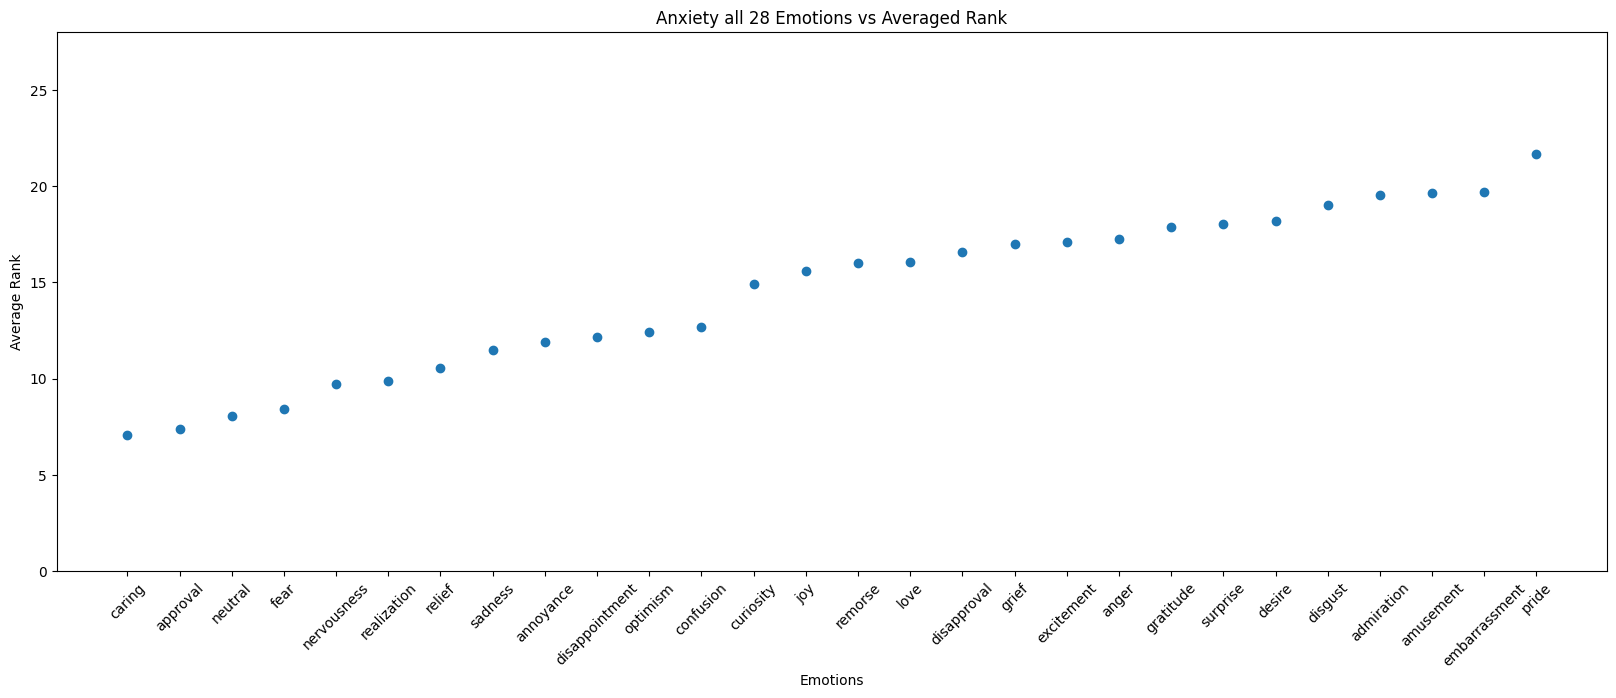

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Anxiety all 28 Emotions vs Averaged Rank')
plt.xlabel('Emotions')
plt.ylabel('Average Rank')
plt.ylim(0, 28)
plt.scatter(x, y)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# !pip install plotly

In [ ]:
import plotly.graph_objects as go

# Create scatter plot
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))

# Add hover annotations
fig.update_layout(hovermode='closest')
fig.update_traces(hovertemplate='Emotion: %{x}<br>Avg Rank: %{y}')

# Set plot labels and title
fig.update_layout(xaxis_title='Emotions', yaxis_title='Avg Rank', title='Anxiety all 28 Emotions vs Averaged Rank')

# Show the plot
fig.show()

In [ ]:
# pickle_out = open("anxiety_allemotions_avg_rank_hover_graph.pickle", 'wb')
# pickle.dump(fig, pickle_out)
# pickle_out.close()

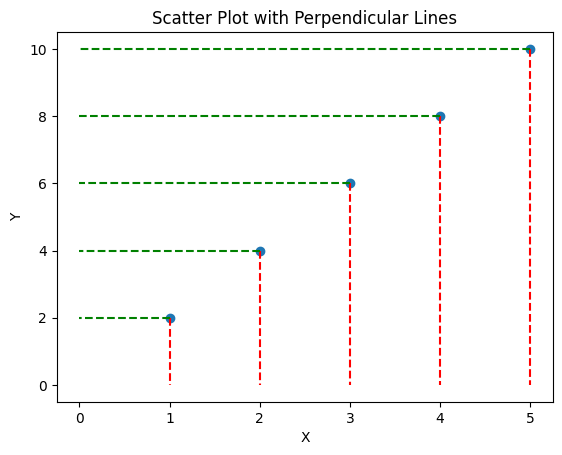

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data
# x = [1, 2, 3, 4, 5]
# y = [2, 4, 6, 8, 10]

# # Create scatter plot
# plt.scatter(x, y)

# # Add perpendicular lines
# for i in range(len(x)):
#     plt.plot([x[i], x[i]], [y[i], 0], 'r--')
#     plt.plot([x[i], 0], [y[i], y[i]], 'g--')

# # Set plot labels and title
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Scatter Plot with Perpendicular Lines')

# # Display the plot
# plt.show()

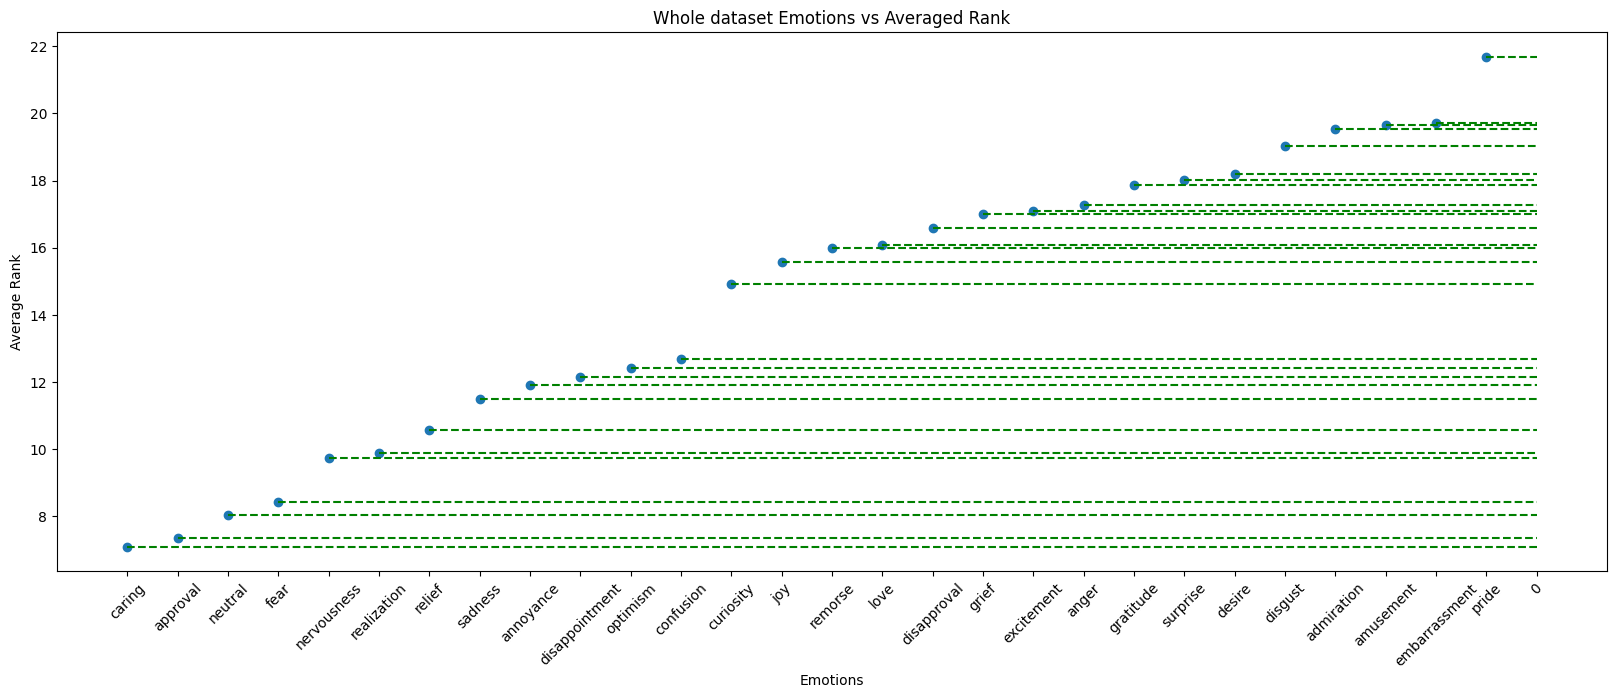

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Whole dataset Emotions vs Averaged Rank')
plt.xlabel('Emotions')
plt.ylabel('Average Rank')
#plt.ylim(0, 3000)
plt.scatter(x, y)
# Add perpendicular lines
for i in range(len(x)):
    #plt.plot([x[i], x[i]], [y[i], 0], 'r--')
    plt.plot([x[i], 0], [y[i], y[i]], 'g--')
plt.xticks(rotation=45)
plt.show()

## Class wise - All 28 Emotions vs Averaged Probability (label - 1 for panic, 0 for anxiety) (RUNS INSTANTLY)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import operator

In [ ]:
pickle_in = open("/content/drive/MyDrive/IDSIA Biomedical Texts/AllSourceEmotions_TwentyJune.pickle", 'rb')
df = pickle.load(pickle_in)
df.head()

In [ ]:
df.head()

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity,Drives,affiliation,achieve,power,Cognition,allnone,cogproc,insight,cause,discrep,tentat,certitude,differ,memory,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,swear,Social,socbehav,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male,Culture,politic,ethnicity,tech,Lifestyle,leisure,home,work,money,relig,Physical,health,illness,wellness,mental,substances,sexual,food,death,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Perception,attention,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,emo_label_prob,top_five_emolabelprob,emo_labels,emo_label_rank,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,all_emolabelprob,all_emo_labels,all_emo_label_rank
0,https://www.quora.com/What-are-panic-attacks-l...,I have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.00,26.39,25.86,93.74,68.86,57.50,12.85,6.26,3.13,0.16,2.31,0.0,0.16,6.59,15.16,7.74,1.15,14.66,9.88,7.08,6.59,0.82,15.82,5.11,5.11,3.46,0.49,1.15,1.81,18.62,0.33,18.29,2.80,3.13,2.47,4.45,0.99,4.45,0.00,10.71,0.99,9.56,7.74,0.16,7.58,6.92,0.16,0.16,0.16,8.73,3.46,0.33,0.33,1.32,0.0,1.15,5.27,0.33,0.0,0.00,0.00,0.00,0.0,0.0,0.00,2.31,0.00,0.00,1.98,0.33,0.00,9.88,8.07,0.82,0.0,5.11,0.0,0.0,0.00,0.16,0.33,0.33,0.16,0.33,0.16,0.49,0.0,0.49,0.16,6.26,7.08,0.33,0.66,4.78,0.16,0.00,1.65,4.61,1.81,8.07,1.48,0.00,0.00,0.00,0.0,0.0,19.93,4.61,9.88,0.16,0.16,2.80,2.31,0.33,"{'admiration': 1.609722e-05, 'amusement': 0.00...","[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, caring]","{'fear': 1, 'nervousness': 2, 'confusion': 3, ...",0.000016,0.000150,0.000705,0.001447,0.000643,0.009114,0.048850,0.010012,0.000057,0.000440,0.000339,0.000160,0.000265,0.000173,0.854317,0.000166,0.000265,0.000040,0.000210,0.068864,0.000185,0.000041,0.000323,0.001267,0.000330,0.000575,0.000205,0.000843,"[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, cari...","{'fear': 1, 'nervousness': 2, 'confusion': 3, ..."
1,https://www.quora.com/What-are-panic-attacks-l...,"I was walking to school, but was running late ...",Quora,1,401,54.08,1.31,99.00,8.57,13.83,14.21,90.02,74.81,61.60,17.96,12.72,11.47,0.00,0.25,0.0,0.75,5.24,15.46,7.98,1.25,15.71,6.98,5.74,6.23,2.00,15.21,5.24,3.24,1.50,0.25,0.75,0.50,11.97,2.74,9.23,1.50,2.00,2.49,1.00,0.25,2.49,0.00,4.24,1.50,2.74,1.50,0.75,0.75,0.00,0.00,0.00,0.00,4.74,2.24,0.25,0.00,0.25,0.0,1.00,2.49,0.00,0.0,0.25,0.00,0.00,0.0,0.0,0.00,3.49,1.00,0.25,2.24,0.00,0.00,3.99,0.50,0.00,0.5,0.00,0.0,0.0,0.00,0.00,0.00,0.25,0.50,0.00,0.00,0.00,0.0,0.25,0.00,3.49,14.71,0.25,3.24,8.98,0.75,0.75,1.50,7.98,10.22,0.75,0.75,0.00,0.00,0.00,0.0,0.0,13.47,6.98,4.74,0.25,0.00,1.50,0.00,0.00,"{'admiration': 5.3580854e-05, 'amusement': 0.1...","[(sadness, 0.41607377), (annoyance, 0.20149426...","[sadness, annoyance, amusement, disappointment...","{'sadness': 1, 'annoyance': 2, 'amusement': 3,...",0.000054,0.167888,0.011522,0.201494,0.000443,0.001504,0.002532,0.000539,0.000486,0.053486,0.012135,0.005403,0.012620,0.000473,0.045313,0.001156,0.000709,0.017801,0.003212,0.013415,0.000246,0.000617,0.022932,0.000231,0.003261,0.416074,0.001216,0.003240,"[(sadness, 0.41607377), (annoyance, 0.20149426...","[sadness, annoyance, amusement, disappointment...","{'sadness': 1, 'annoyance': 2, 'amusement': 3,..."
2,https://www.quora.com/What-are-panic-attacks-l...,"For me, panic attacks come two ways: randomly ...",Quo

In [ ]:
df.shape

(7405, 157)

In [ ]:
df.loc[:, 'admiration':'neutral']

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0.000016,0.000150,0.000705,0.001447,0.000643,0.009114,0.048850,0.010012,0.000057,0.000440,0.000339,0.000160,0.000265,0.000173,0.854317,0.000166,0.000265,0.000040,0.000210,0.068864,0.000185,0.000041,0.000323,0.001267,0.000330,0.000575,0.000205,0.000843
1,0.000054,0.167888,0.011522,0.201494,0.000443,0.001504,0.002532,0.000539,0.000486,0.053486,0.012135,0.005403,0.012620,0.000473,0.045313,0.001156,0.000709,0.017801,0.003212,0.013415,0.000246,0.000617,0.022932,0.000231,0.003261,0.416074,0.001216,0.003240
2,0.000101,0.000596,0.000428,0.001275,0.006295,0.013178,0.412494,0.034596,0.000124,0.002020,0.000344,0.000193,0.000744,0.000525,0.081238,0.000199,0.004233,0.000337,0.001481,0.035853,0.000615,0.000224,0.336612,0.002241,0.001373,0.007805,0.013074,0.041802
3,0.000054,0.000639,0.043696,0.003672,0.000041,0.007463,0.000333,0.000094,0.000294,0.002422,0.000207,0.005001,0.000633,0.000092,0.821281,0.000076,0.035779,0.000188,0.005427,0.010949,0.000076,0.000740,0.000619,0.000275,0.001561,0.057985,0.000332,0.000073
4,0.000004,0.000040,0.000176,0.000860,0.000181,0.000255,0.001674,0.000182,0.000016,0.001535,0.000209,0.000108,0.000199,0.000030,0.910931,0.000034,0.000098,0.000010,0.000145,0.079422,0.000020,0.000017,0.000338,0.000211,0.000071,0.002956,0.000103,0.000174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,0.000907,0.000017,0.000027,0.000027,0.000360,0.001514,0.000162,0.000076,0.000035,0.000038,0.000024,0.000037,0.000012,0.000073,0.000211,0.995492,0.000120,0.000020,0.000018,0.000038,0.000060,0.000021,0.000021,0.000448,0.000136,0.000022,0.000016,0.000068
7401,0.000451,0.000075,0.000005,0.000022,0.000736,0.000157,0.000070,0.000227,0.000052,0.000015,0.000021,0.000009,0.000002,0.000106,0.000004,0.996667,0.000011,0.000099,0.000010,0.000004,0.000037,0.000003,0.000018,0.000051,0.000023,0.000008,0.000011,0.001105
7402,0.000228,0.000024,0.000010,0.000034,0.000405,0.000364,0.000123,0.000703,0.000040,0.000015,0.000014,0.000017,0.000004,0.000093,0.000009,0.997167,0.000013,0.000059,0.000008,0.000007,0.000077,0.000003,0.000009,0.000134,0.000023,0.000008,0.000013,0.000393
7403,0.000064,0.000080,0.000109,0.000155,0.012040,0.932658,0.000593,0.001206,0.000311,0.000126,0.000109,0.000030,0.000041,0.000215,0.007893,0.000334,0.000344,0.000250,0.000124,0.016793,0.015985,0.000026,0.000285,0.005689,0.000256,0.000404,0.000174,0.003708


In [ ]:
df.loc[:, 'admiration':'neutral'].describe()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7.405000e+03,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000,7405.000000
mean,0.031439,0.038586,0.008956,0.012725,0.064227,0.167606,0.014498,0.044714,0.004673,0.009523,0.003555,0.006033,0.006546,0.008513,0.121853,0.092265,0.005374,0.032440,0.016327,0.076964,0.033328,2.002982e-03,0.042995,0.012314,0.009023,0.034678,0.006494,0.092349
std,0.144938,0.173847,0.065932,0.071581,0.168858,0.306413,0.078597,0.165684,0.050078,0.058214,0.034737,0.053605,0.061809,0.070749,0.265153,0.267624,0.036240,0.137890,0.098048,0.195461,0.128549,2.540477e-02,0.159473,0.066604,0.061147,0.129211,0.058838,0.218400
min,0.000002,0.000006,0.000005,0.000008,0.000015,0.000006,0.000006,0.000002,0.000005,0.000007,0.000012,0.000007,0.000002,0.000005,0.000004,0.000004,0.000002,0.000005,0.000006,0.000001,0.000005,4.472920e-07,0.000005,0.000002,0.000005,0.000005,0.000004,0.000004
25%,0.000058,0.000068,0.000082,0.000191,0.000670,0.000635,0.000160,0.000132,0.000105,0.000173,0.000115,0.000064,0.000035,0.000101,0.000228,0.000096,0.000083,0.000148,0.000123,0.000111,0.000231,2.776544e-05,0.000260,0.000227,0.000115,0.000172,0.000094,0.000983
50%,0.000200,0.000187,0.000213,0.000549,0.003370,0.004206,0.000481,0.000384,0.000249,0.000672,0.000274,0.000157,0.000114,0.000281,0.001903,0.000273,0.000259,0.000476,0.000318,0.000982,0.001064,7.912028e-05,0.001151,0.000910,0.000308,0.000825,0.000245,0.005786
75%,0.000866,0.000619,0.000722,0.001937,0.028534,0.133954,0.001856,0.001852,0.000646,0.002735,0.000782,0.000509,0.000418,0.000789,0.051835,0.001401,0.000967,0.002653,0.000998,0.021154,0.005944,2.740871e-04,0.006012,0.003480,0.000958,0.005163,0.000698,0.041223
max,0.994510,0.995999,0.990356,0.989609,0.995642,0.995192,0.995544,0.996923,0.991133,0.959116,0.993828,0.981988,0.994885,0.994284,0.997356,0.998891,0.857508,0.988043,0.991860,0.975672,0.994382,9.435648e-01,0.997479,0.981814,0.961554,0.984084,0.993997,0.998033


In [ ]:
df['admiration'].mean()

0.031439222

In [ ]:
class_df = df[df['label'] == 1] #1 for panic, 0 for anxiety
class_df.head(2)

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity,Drives,affiliation,achieve,power,Cognition,allnone,cogproc,insight,cause,discrep,tentat,certitude,differ,memory,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,swear,Social,socbehav,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male,Culture,politic,ethnicity,tech,Lifestyle,leisure,home,work,money,relig,Physical,health,illness,wellness,mental,substances,sexual,food,death,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Perception,attention,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,emo_label_prob,top_five_emolabelprob,emo_labels,emo_label_rank,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,all_emolabelprob,all_emo_labels,all_emo_label_rank
578,https://www.quora.com/What-is-an-anxiety/answe...,"Anxiety is feeling of disturbance,stress, over...",Quora,0,45,10.19,99.00,4.71,1.0,22.5,33.33,84.44,53.33,42.22,17.78,11.11,0.00,0.00,11.11,0.00,0.00,6.67,8.89,2.22,0.00,4.44,11.11,2.22,8.89,0.00,17.78,4.44,0.00,0.00,0.00,0.00,0.00,8.89,0.0,8.89,4.44,2.22,0.00,2.22,0.00,0.00,0.00,24.44,2.22,22.22,24.44,2.22,22.22,20.00,0.00,0.0,0.0,13.33,0.00,0.00,0.00,0.00,0.00,0.00,13.33,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,2.22,0.00,0.00,2.22,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,6.67,8.89,0.00,0.00,0.00,2.22,0.00,6.67,4.44,0.00,11.11,2.22,0.00,0.00,0.00,0.0,0.0,37.78,17.78,15.56,0.00,0.0,2.22,2.22,0.0,"{'admiration': 8.448096e-06, 'amusement': 7.75...","[(nervousness, 0.52364683), (fear, 0.4671843),...","[nervousness, fear, approval, caring, sadness]","{'nervousness': 1, 'fear': 2, 'approval': 3, '...",0.000008,0.000078,0.000161,0.000573,0.001908,0.001348,0.000204,0.000115,0.000069,0.000718,0.000164,0.00011,0.000127,0.000549,0.467184,0.000028,0.000085,0.000057,0.000299,0.523647,0.000063,0.000034,0.000376,0.000485,0.000051,0.001124,0.000112,0.000320,"[(nervousness, 0.52364683), (fear, 0.4671843),...","[nervousness, fear, approval, caring, sadness,...","{'nervousness': 1, 'fear': 2, 'approval': 3, '..."
579,https://www.quora.com/What-is-an-anxiety/answe...,*A little note before you read the actual answ...,Quora,0,729,38.82,31.62,56.84,1.0,31.7,20.85,93.96,71.19,54.87,15.23,8.78,3.98,0.14,3.84,0.14,0.69,6.45,12.76,5.21,0.27,12.89,8.78,5.21,7.00,2.19,17.15,7.13,3.29,4.39,1.78,1.37,1.37,19.20,1.1,18.11,3.70,2.61,2.19,4.80,0.55,4.94,0.14,11.11,2.88,8.09,6.45,0.69,5.62,4.66,0.27,0.0,0.0,11.25,5.35,1.23,0.14,0.41,0.82,1.37,5.62,0.27,0.0,0.27,0.0,0.14,0.0,0.0,0.14,1.92,0.69,0.14,0.96,0.14,0.0,9.19,7.13,0.27,0.27,4.39,0.14,0.0,0.27,0.14,0.14,0.27,0.69,0.0,0.14,0.14,0.0,0.55,0.27,7.96,7.41,0.14,1.23,3.84,0.69,0.27,1.65,3.70,0.69,6.17,2.33,0.41,0.14,0.27,0.0,0.0,15.78,5.08,4.94,0.14,0.0,1.10,4.53,0.0,"{'admiration': 2.5965453e-05, 'amusement': 0.0...","[(fear, 0.9280037), (nervousness, 0.035885453)...","[fear, nervousness, confusion, caring, curiosity]","{'fear': 1, 'nervousness': 2, 'confusion': 3, ...",0.000026,0.000136,0.000378,0.000978,0.001354,0.006880,0.013463,0.004451,0.000049,0.000603,0.000058,0.00011,0.000085,0.000049,0.928004,0.000036,0.000314,0.000022,0.000227,0.035885,0.000135,0.000014,0.000373,0.000297,0.000151,0.002688,0.000227,0.003006,"[(fear, 0.9280037), (nervousness, 0.035885453)...","[fear, nervousness, confusion, caring, curiosi...","{'fear': 1, 'nervousness': 2, 'confusion': 3, ..."


In [ ]:
class_df.loc[:, 'admiration':'neutral'].describe()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2.765000e+03,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000
mean,0.024125,0.008926,0.010354,0.016225,0.073688,0.157965,0.017163,0.036970,0.003606,0.008683,0.004300,0.006274,0.009886,0.002482,0.149015,0.105305,0.004760,0.018425,0.006489,0.126400,0.022180,2.996773e-03,0.055037,0.011590,0.007406,0.033187,0.002840,0.073725
std,0.125515,0.076589,0.071112,0.084552,0.180881,0.299958,0.085921,0.154615,0.043260,0.050132,0.044263,0.053046,0.079165,0.026626,0.278277,0.284557,0.033130,0.102246,0.050062,0.244847,0.098101,3.272130e-02,0.182995,0.058812,0.059201,0.126173,0.028864,0.194265
min,0.000002,0.000006,0.000005,0.000009,0.000015,0.000009,0.000007,0.000003,0.000005,0.000010,0.000013,0.000009,0.000002,0.000006,0.000004,0.000004,0.000002,0.000005,0.000006,0.000001,0.000005,4.472920e-07,0.000005,0.000004,0.000010,0.000005,0.000005,0.000008
25%,0.000038,0.000065,0.000092,0.000217,0.000777,0.000782,0.000192,0.000126,0.000092,0.000218,0.000118,0.000066,0.000045,0.000101,0.000442,0.000077,0.000087,0.000116,0.000129,0.000258,0.000197,3.541944e-05,0.000341,0.000342,0.000123,0.000218,0.000093,0.000711
50%,0.000127,0.000154,0.000223,0.000658,0.004476,0.003919,0.000593,0.000352,0.000223,0.000818,0.000266,0.000166,0.000155,0.000276,0.007488,0.000208,0.000248,0.000333,0.000317,0.004872,0.000850,9.947791e-05,0.001613,0.001241,0.000299,0.001053,0.000236,0.003811
75%,0.000520,0.000439,0.000768,0.002548,0.038173,0.098939,0.001921,0.001380,0.000507,0.003034,0.000723,0.000526,0.000581,0.000697,0.128761,0.000899,0.000835,0.001169,0.000839,0.088324,0.004551,3.326116e-04,0.008525,0.004549,0.000927,0.005450,0.000585,0.026049
max,0.992382,0.987463,0.990356,0.989609,0.995642,0.995192,0.990785,0.996923,0.991133,0.933813,0.993828,0.953636,0.994885,0.693150,0.996890,0.998591,0.710221,0.983813,0.929105,0.975672,0.988101,9.435648e-01,0.997479,0.918436,0.961554,0.984084,0.940733,0.997904


In [ ]:
class_df.loc[:, 'admiration':'neutral'].describe().loc['mean']

admiration        0.024125
amusement         0.008926
anger             0.010354
annoyance         0.016225
approval          0.073688
caring            0.157965
confusion         0.017163
curiosity         0.036970
desire            0.003606
disappointment    0.008683
disapproval       0.004300
disgust           0.006274
embarrassment     0.009886
excitement        0.002482
fear              0.149015
gratitude         0.105305
grief             0.004760
joy               0.018425
love              0.006489
nervousness       0.126400
optimism          0.022180
pride             0.002997
realization       0.055037
relief            0.011590
remorse           0.007406
sadness           0.033187
surprise          0.002840
neutral           0.073725
Name: mean, dtype: float64

In [ ]:
dict(class_df.loc[:, 'admiration':'neutral'].describe().loc['mean'])

{'admiration': 0.024124713614583015,
 'amusement': 0.008926223032176495,
 'anger': 0.010353662073612213,
 'annoyance': 0.01622450165450573,
 'approval': 0.07368801534175873,
 'caring': 0.1579645425081253,
 'confusion': 0.017163053154945374,
 'curiosity': 0.03696998208761215,
 'desire': 0.003605595324188471,
 'disappointment': 0.00868250336498022,
 'disapproval': 0.004300021566450596,
 'disgust': 0.006274036597460508,
 'embarrassment': 0.009885956533253193,
 'excitement': 0.002482005162164569,
 'fear': 0.14901497960090637,
 'gratitude': 0.1053047925233841,
 'grief': 0.004760062787681818,
 'joy': 0.01842460408806801,
 'love': 0.00648923683911562,
 'nervousness': 0.12640038132667542,
 'optimism': 0.022179655730724335,
 'pride': 0.0029967734590172768,
 'realization': 0.055036917328834534,
 'relief': 0.011589611880481243,
 'remorse': 0.007406223565340042,
 'sadness': 0.033187106251716614,
 'surprise': 0.002839893801137805,
 'neutral': 0.07372494041919708}

In [ ]:
a = dict(sorted(dict(class_df.loc[:, 'admiration':'neutral'].describe().loc['mean']).items(), key=operator.itemgetter(1)))
a

{'excitement': 0.002482005162164569,
 'surprise': 0.002839893801137805,
 'pride': 0.0029967734590172768,
 'desire': 0.003605595324188471,
 'disapproval': 0.004300021566450596,
 'grief': 0.004760062787681818,
 'disgust': 0.006274036597460508,
 'love': 0.00648923683911562,
 'remorse': 0.007406223565340042,
 'disappointment': 0.00868250336498022,
 'amusement': 0.008926223032176495,
 'embarrassment': 0.009885956533253193,
 'anger': 0.010353662073612213,
 'relief': 0.011589611880481243,
 'annoyance': 0.01622450165450573,
 'confusion': 0.017163053154945374,
 'joy': 0.01842460408806801,
 'optimism': 0.022179655730724335,
 'admiration': 0.024124713614583015,
 'sadness': 0.033187106251716614,
 'curiosity': 0.03696998208761215,
 'realization': 0.055036917328834534,
 'approval': 0.07368801534175873,
 'neutral': 0.07372494041919708,
 'gratitude': 0.1053047925233841,
 'nervousness': 0.12640038132667542,
 'fear': 0.14901497960090637,
 'caring': 0.1579645425081253}

In [ ]:
emo_prob_df = pd.DataFrame(a.items(), columns=['Emotions', 'Anxiety Avg probability'])
emo_prob_df

,Emotions,Anxiety Avg probability
0,excitement,0.002482
1,surprise,0.002840
2,pride,0.002997
3,desire,0.003606
4,disapproval,0.004300
5,grief,0.004760
6,disgust,0.006274
7,love,0.006489
8,remorse,0.007406
9,disappointment,0.008683


In [ ]:
x = list(a.keys())
y = list(a.values())

In [ ]:
print(x)

['excitement', 'surprise', 'pride', 'desire', 'disapproval', 'grief', 'disgust', 'love', 'remorse', 'disappointment', 'amusement', 'embarrassment', 'anger', 'relief', 'annoyance', 'confusion', 'joy', 'optimism', 'admiration', 'sadness', 'curiosity', 'realization', 'approval', 'neutral', 'gratitude', 'nervousness', 'fear', 'caring']


In [ ]:
print(y)

[0.002482005162164569, 0.002839893801137805, 0.0029967734590172768, 0.003605595324188471, 0.004300021566450596, 0.004760062787681818, 0.006274036597460508, 0.00648923683911562, 0.007406223565340042, 0.00868250336498022, 0.008926223032176495, 0.009885956533253193, 0.010353662073612213, 0.011589611880481243, 0.01622450165450573, 0.017163053154945374, 0.01842460408806801, 0.022179655730724335, 0.024124713614583015, 0.033187106251716614, 0.03696998208761215, 0.055036917328834534, 0.07368801534175873, 0.07372494041919708, 0.1053047925233841, 0.12640038132667542, 0.14901497960090637, 0.1579645425081253]


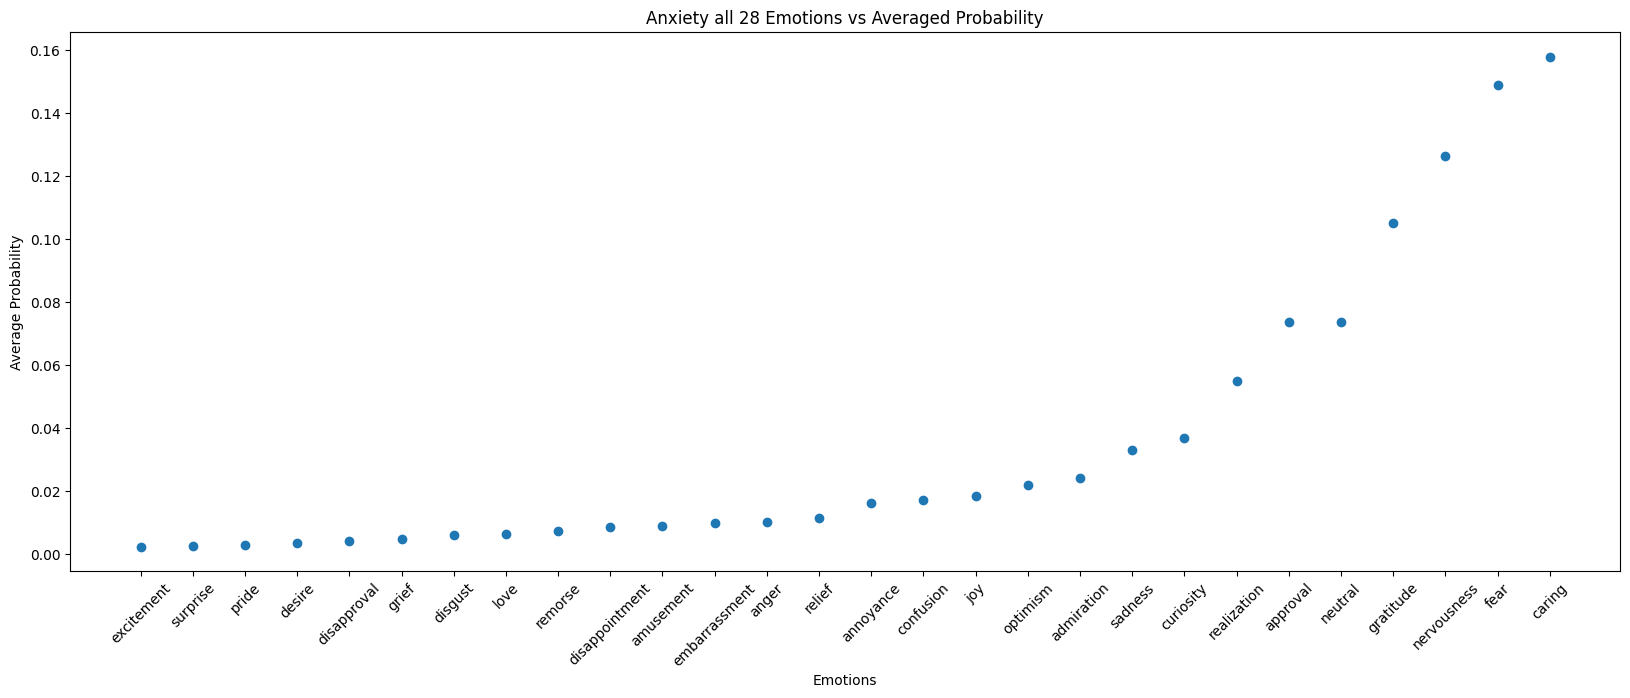

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Anxiety all 28 Emotions vs Averaged Probability')
plt.xlabel('Emotions')
plt.ylabel('Average Probability')
#plt.ylim(0, 28)
plt.scatter(x, y)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.graph_objects as go

# Create scatter plot
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))

# Add hover annotations
fig.update_layout(hovermode='closest')
fig.update_traces(hovertemplate='Emotion: %{x}<br>Avg Rank: %{y}')

# Set plot labels and title
fig.update_layout(xaxis_title='Emotions', yaxis_title='Avg Rank', title='Anxiety all 28 Emotions vs Averaged Probability')  # add these as parameters to change size: width = 1750,height = 650

# Show the plot
fig.show()

## NEW DATAFRAME

In [ ]:
df.head()

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity,Drives,affiliation,achieve,power,Cognition,allnone,cogproc,insight,cause,discrep,tentat,certitude,differ,memory,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,swear,Social,socbehav,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male,Culture,politic,ethnicity,tech,Lifestyle,leisure,home,work,money,relig,Physical,health,illness,wellness,mental,substances,sexual,food,death,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Perception,attention,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,emo_label_prob,top_five_emolabelprob,emo_labels,emo_label_rank,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,all_emolabelprob,all_emo_labels,all_emo_label_rank
0,https://www.quora.com/What-are-panic-attacks-l...,I have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.00,26.39,25.86,93.74,68.86,57.50,12.85,6.26,3.13,0.16,2.31,0.0,0.16,6.59,15.16,7.74,1.15,14.66,9.88,7.08,6.59,0.82,15.82,5.11,5.11,3.46,0.49,1.15,1.81,18.62,0.33,18.29,2.80,3.13,2.47,4.45,0.99,4.45,0.00,10.71,0.99,9.56,7.74,0.16,7.58,6.92,0.16,0.16,0.16,8.73,3.46,0.33,0.33,1.32,0.0,1.15,5.27,0.33,0.0,0.00,0.00,0.00,0.0,0.0,0.00,2.31,0.00,0.00,1.98,0.33,0.00,9.88,8.07,0.82,0.0,5.11,0.0,0.0,0.00,0.16,0.33,0.33,0.16,0.33,0.16,0.49,0.0,0.49,0.16,6.26,7.08,0.33,0.66,4.78,0.16,0.00,1.65,4.61,1.81,8.07,1.48,0.00,0.00,0.00,0.0,0.0,19.93,4.61,9.88,0.16,0.16,2.80,2.31,0.33,"{'admiration': 1.609722e-05, 'amusement': 0.00...","[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, caring]","{'fear': 1, 'nervousness': 2, 'confusion': 3, ...",0.000016,0.000150,0.000705,0.001447,0.000643,0.009114,0.048850,0.010012,0.000057,0.000440,0.000339,0.000160,0.000265,0.000173,0.854317,0.000166,0.000265,0.000040,0.000210,0.068864,0.000185,0.000041,0.000323,0.001267,0.000330,0.000575,0.000205,0.000843,"[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, cari...","{'fear': 1, 'nervousness': 2, 'confusion': 3, ..."
1,https://www.quora.com/What-are-panic-attacks-l...,"I was walking to school, but was running late ...",Quora,1,401,54.08,1.31,99.00,8.57,13.83,14.21,90.02,74.81,61.60,17.96,12.72,11.47,0.00,0.25,0.0,0.75,5.24,15.46,7.98,1.25,15.71,6.98,5.74,6.23,2.00,15.21,5.24,3.24,1.50,0.25,0.75,0.50,11.97,2.74,9.23,1.50,2.00,2.49,1.00,0.25,2.49,0.00,4.24,1.50,2.74,1.50,0.75,0.75,0.00,0.00,0.00,0.00,4.74,2.24,0.25,0.00,0.25,0.0,1.00,2.49,0.00,0.0,0.25,0.00,0.00,0.0,0.0,0.00,3.49,1.00,0.25,2.24,0.00,0.00,3.99,0.50,0.00,0.5,0.00,0.0,0.0,0.00,0.00,0.00,0.25,0.50,0.00,0.00,0.00,0.0,0.25,0.00,3.49,14.71,0.25,3.24,8.98,0.75,0.75,1.50,7.98,10.22,0.75,0.75,0.00,0.00,0.00,0.0,0.0,13.47,6.98,4.74,0.25,0.00,1.50,0.00,0.00,"{'admiration': 5.3580854e-05, 'amusement': 0.1...","[(sadness, 0.41607377), (annoyance, 0.20149426...","[sadness, annoyance, amusement, disappointment...","{'sadness': 1, 'annoyance': 2, 'amusement': 3,...",0.000054,0.167888,0.011522,0.201494,0.000443,0.001504,0.002532,0.000539,0.000486,0.053486,0.012135,0.005403,0.012620,0.000473,0.045313,0.001156,0.000709,0.017801,0.003212,0.013415,0.000246,0.000617,0.022932,0.000231,0.003261,0.416074,0.001216,0.003240,"[(sadness, 0.41607377), (annoyance, 0.20149426...","[sadness, annoyance, amusement, disappointment...","{'sadness': 1, 'annoyance': 2, 'amusement': 3,..."
2,https://www.quora.com/What-are-panic-attacks-l...,"For me, panic attacks come two ways: randomly ...",Quo

In [ ]:
# pickle_out = open("AllSourceEmotions_TwentyJune.pickle", 'wb')
# pickle.dump(df, pickle_out)
# pickle_out.close()